<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Prepare-the-Data" data-toc-modified-id="Prepare-the-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Prepare the Data</a></span><ul class="toc-item"><li><span><a href="#Loading-and-Initial-Data-Exploration" data-toc-modified-id="Loading-and-Initial-Data-Exploration-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Loading and Initial Data Exploration</a></span></li><li><span><a href="#Enrichment-Efficiency" data-toc-modified-id="Enrichment-Efficiency-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Enrichment Efficiency</a></span></li><li><span><a href="#Data-preprocessing---missing-columns-in-test-set" data-toc-modified-id="Data-preprocessing---missing-columns-in-test-set-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Data preprocessing - missing columns in test set</a></span></li><li><span><a href="#Handling-missing-values" data-toc-modified-id="Handling-missing-values-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Handling missing values</a></span></li></ul></li><li><span><a href="#Data-Analysis" data-toc-modified-id="Data-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Metal-Concentration-(Au,-Ag,-Pb)" data-toc-modified-id="Metal-Concentration-(Au,-Ag,-Pb)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Metal Concentration (Au, Ag, Pb)</a></span></li><li><span><a href="#The-size-of-the-raw-material-particles" data-toc-modified-id="The-size-of-the-raw-material-particles-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>The size of the raw material particles</a></span></li><li><span><a href="#Total-concentration-of-all-substances-at-different-stages" data-toc-modified-id="Total-concentration-of-all-substances-at-different-stages-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Total concentration of all substances at different stages</a></span></li></ul></li><li><span><a href="#Model" data-toc-modified-id="Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model</a></span><ul class="toc-item"><li><span><a href="#sMAPE" data-toc-modified-id="sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>sMAPE</a></span></li><li><span><a href="#Verifying-the-model-on-a-test-set" data-toc-modified-id="Verifying-the-model-on-a-test-set-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Verifying the model on a test set</a></span></li><li><span><a href="#Adequacy-of-the-model" data-toc-modified-id="Adequacy-of-the-model-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Adequacy of the model</a></span></li></ul></li><li><span><a href="#General-conclusion" data-toc-modified-id="General-conclusion-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>General conclusion</a></span></li></ul></div>

# Gold Recovery from Ore

Prepare a machine learning model prototype for "Цифра" (the company). The company develops solutions for the efficient operation of industrial enterprises.

The model should predict the gold recovery rate from gold-bearing ore using data with parameters related to extraction and purification.

The model will help optimize production to avoid launching facilities with unprofitable characteristics.

You need to:

-Prepare the data.

-Conduct exploratory data analysis.

-Build and train the model.

To complete the project, refer to the pandas, matplotlib, and scikit-learn libraries. Their documentation will be helpful.

# Project Description


The data is contained in three files:

gold_recovery_train_new.csv — training set;
gold_recovery_test_new.csv — test set;
gold_recovery_full_new.csv — original data.
The data is indexed by the date and time the information was received (feature date). Parameters close in time are often similar. Some parameters are not available because they are measured and/or calculated significantly later. Therefore, some features may be missing in the test set but present in the training set. Additionally, the test set lacks target features. The original dataset contains both the training and test sets with all features.

You have raw data at your disposal: it was simply unloaded from the storage. Before building the model, check the data for correctness using our instructions.

Project Instructions

1. Prepare the Data

1.1. Open the files and examine them.

Paths to the files:

/datasets/gold_recovery_train_new.csv
/datasets/gold_recovery_test_new.csv
/datasets/gold_recovery_full_new.csv
1.2. Verify that the enrichment efficiency is calculated correctly. Calculate it for the training set feature rougher.output.recovery. Find the MAE between your calculations and the feature's value. Describe your findings.

1.3. Analyze the features unavailable in the test set. What are these parameters? What type do they belong to?

1.4. Perform data preprocessing.

2. Analyze the Data

2.1. Examine how the concentration of metals (Au, Ag, Pb) changes at different stages of purification. Describe your findings.

2.2. Compare the distributions of raw material particle sizes in the training and test sets. If the distributions differ significantly, the model evaluation will be incorrect.

2.3. Investigate the total concentration of all substances at different stages: in the raw material, in the rough concentrate, and in the final concentrate.

3. Build the Model
3.1. Write a function to calculate the final sMAPE.

3.2. Train different models and evaluate their quality using cross-validation. Choose the best model and test it on the test set. Describe your findings.


## Prepare the Data

### Loading and Initial Data Exploration

In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# графики
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

from IPython.display import display, HTML, Image
from ipywidgets import GridspecLayout

import warnings
warnings.filterwarnings("ignore")

In [2]:
try:
  train = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_train_new.csv')
  test = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_test_new.csv')
  full = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_full_new.csv')
except:
  train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
  test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
  full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [3]:
datasets = [train, test, full]
for dataset in datasets:
  display(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


None

87 columns - a very large feature set

In [4]:
#Let's check for missing values, duplicates, and the volume of data

def get_missing_values(data):
    x = (
        data.isna()
        .sum()
        .rename("missing_count")
        .to_frame()
        .join(dataset.isna().mean().rename("missing_ratio").to_frame())
        .sort_values(by="missing_count", ascending=False)
        
    )
    return x

In [5]:
train.name = "Обучающая выборка"
test.name = "Тестовая выборка"
full.name = "Исходные данные"

In [6]:
for dataset in datasets:
    print(f"=====> {dataset.name} <======")
    print(f"Объем данных: {dataset.shape}")
    print()
    print("Duplicates:", dataset.duplicated().sum())
    print()

    print("Количество пропусков:")
    display(get_missing_values(dataset))
    print()

=====> Обучающая выборка <======
Объем данных: (14149, 87)

Duplicates: 0

Количество пропусков:


,missing_count,missing_ratio
secondary_cleaner.output.tail_sol,1605,0.113436
rougher.state.floatbank10_e_air,436,0.030815
rougher.input.floatbank11_xanthate,428,0.030249
primary_cleaner.output.concentrate_sol,286,0.020213
secondary_cleaner.state.floatbank2_a_air,217,0.015337
...,...,...
rougher.output.concentrate_pb,0,0.000000
rougher.output.concentrate_au,0,0.000000
rougher.output.recovery,0,0.000000
rougher.output.tail_pb,0,0.000000



=====> Тестовая выборка <======
Объем данных: (5290, 53)

Duplicates: 0

Количество пропусков:


,missing_count,missing_ratio
rougher.input.floatbank11_xanthate,25,0.004726
rougher.input.feed_sol,21,0.003970
secondary_cleaner.state.floatbank3_a_air,9,0.001701
rougher.input.floatbank11_sulfate,8,0.001512
primary_cleaner.input.depressant,5,0.000945
rougher.input.floatbank10_sulfate,5,0.000945
primary_cleaner.input.xanthate,4,0.000756
primary_cleaner.input.sulfate,4,0.000756
rougher.input.feed_rate,3,0.000567
secondary_cleaner.state.floatbank2_a_air,3,0.000567



=====> Исходные данные <======
Объем данных: (19439, 87)

Duplicates: 0

Количество пропусков:


,missing_count,missing_ratio
secondary_cleaner.output.tail_sol,1748,0.089922
rougher.input.floatbank11_xanthate,453,0.023304
rougher.state.floatbank10_e_air,436,0.022429
primary_cleaner.output.concentrate_sol,370,0.019034
secondary_cleaner.state.floatbank2_a_air,220,0.011317
...,...,...
rougher.state.floatbank10_d_level,0,0.000000
rougher.state.floatbank10_d_air,0,0.000000
rougher.output.tail_pb,0,0.000000
rougher.output.tail_sol,0,0.000000



Intermediate Conclusions

As we can see, the data was correctly read when opening the dataframes.

There are no categorical features.

The feature names are clear and correspond to the processing stages, which simplifies understanding of the process.

There are missing values in most columns.

The data type of the date column is object.

Some features are missing in the test set - 53 features, whereas there are 87 features in the other two sets.

### Enrichment Efficiency

In [7]:
#Let's calculate the enrichment efficiency in the training set.
C = train['rougher.output.concentrate_au']
F = train['rougher.input.feed_au']
T = train['rougher.output.tail_au']

In [8]:
#let's create a new column for our calculations
train['recovery_calc'] = ((C*(F-T))/(F*(C-T)))*100
train['recovery_calc'].mean()

82.70450164550293

In [9]:
#let's compare with rougher.output.recovery
train['rougher.output.recovery'].mean()

82.70450164550293

The values are the same, so the efficiency is most likely calculated correctly

In [10]:
print(mean_absolute_error(train['recovery_calc'], train['rougher.output.recovery']))

9.73512347450521e-15


The MAE value is very small, so the enrichment efficiency is most likely calculated correctly.

In [11]:
#delete our column
train.drop('recovery_calc', axis=1, inplace=True)

### Data preprocessing - missing columns in test set

In [12]:
# Missing columns in data_train
set(train.columns)-set(test.columns) 

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

The test dataset lacks columns with product quantity data and calculated data - they are not available at the beginning of the technical process and become known only later.

Some features are computed based on the above. Some calculations are even made based on the target variable. Values for final.output, primary_cleaner.output, rougher.calculations, rougher.output, secondary_cleaner.output are missing. It will be necessary to remove columns from the training dataset except for the target features.

We are concerned about the missing values in the columns with the target feature. It won't be possible to train the model on such data.


### Handling missing values

Since the project description states that the data is indexed by the date and time of information retrieval (feature 'date') and neighboring parameters are often similar in time, we will fill the missing values with the corresponding values in the next row using the ffill method.

There aren't many missing values in the features. All observations are sequential measurements, and the gaps can be filled using pandas methods: ffill/bfill/interpolate, which is quite appropriate. An article that discusses various methods of handling missing values, highlighting their pros and cons, can be found here: https://loginom.ru/blog/missing.

In [13]:
for dataset in datasets:
  dataset.ffill(axis='rows', inplace=True)

In [14]:
#check
for dataset in datasets:
  display(dataset.isna().sum())

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

## Data Analysis

### Metal Concentration (Au, Ag, Pb)

In [15]:
#Data for silver
df_ag = full[['rougher.output.concentrate_ag', 
              'primary_cleaner.output.concentrate_ag', 
              'final.output.concentrate_ag']]
#We will rename the columns 
df_ag = df_ag.rename(columns={'rougher.output.concentrate_ag': 'флотация', 
                              'primary_cleaner.output.concentrate_ag': 'первичная очистка', 
                              'final.output.concentrate_ag': 'финальная очистка'})

In [16]:
#Data for lead
df_pb = full[['rougher.output.concentrate_pb', 
              'primary_cleaner.output.concentrate_pb', 
              'final.output.concentrate_pb']]
#We will rename the columns
df_pb = df_pb.rename(columns={'rougher.output.concentrate_pb': 'флотация', 
                              'primary_cleaner.output.concentrate_pb': 'первичная очистка', 
                              'final.output.concentrate_pb': 'финальная очистка'})

In [17]:
#Data for gold
df_au = full[['rougher.output.concentrate_au', 
              'primary_cleaner.output.concentrate_au', 
              'final.output.concentrate_au']]
#We will rename the columns 
df_au = df_au.rename(columns={'rougher.output.concentrate_au': 'флотация', 
                              'primary_cleaner.output.concentrate_au': 'первичная очистка', 
                              'final.output.concentrate_au': 'финальная очистка'})

Text(0, 0.5, 'Концентрация металла')

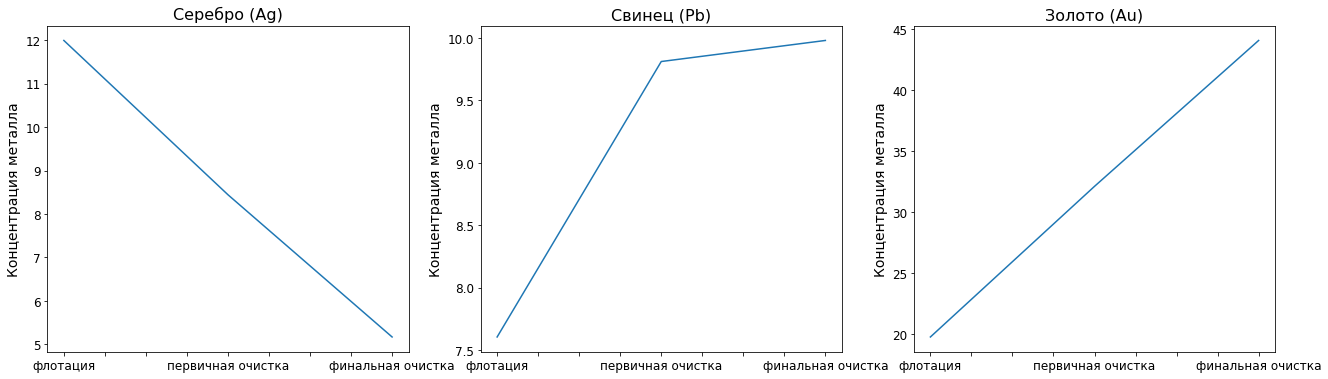

In [18]:
#Let's plot graphs for each metal.
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, linewidth=3, figsize=(22, 6))#1 ряд, 3 графика

df_ag.mean().plot(ax=ax1, subplots=True, fontsize=12)
ax1.set_title('Серебро (Ag)', fontsize=16)
ax1.set_ylabel('Концентрация металла', fontsize=14)

df_pb.mean().plot(ax=ax2, subplots=True, fontsize=12)
ax2.set_title('Свинец (Pb)', fontsize=16)
ax2.set_ylabel('Концентрация металла', fontsize=14)

df_au.mean().plot(ax=ax3, subplots=True, fontsize=12)
ax3.set_title('Золото (Au)', fontsize=16)
ax3.set_ylabel('Концентрация металла', fontsize=14)

Text(0.5, 1.0, 'Гистограмма распределения концентрации золота')

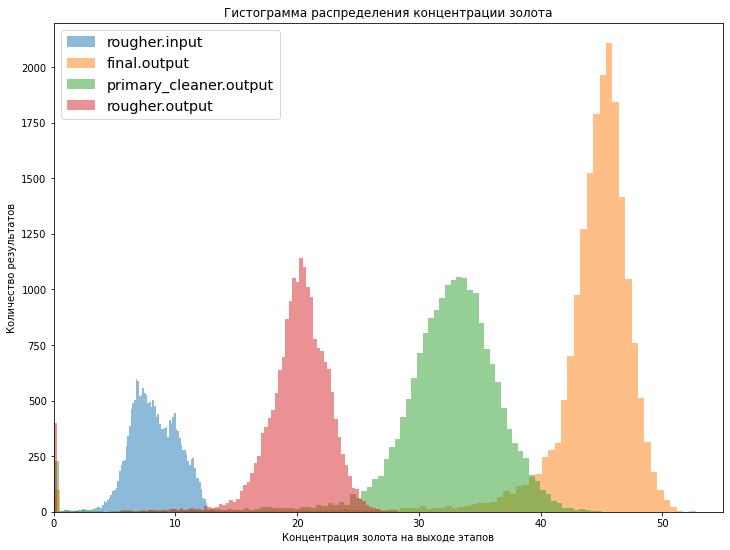

In [19]:
#Let's plot histograms.

plt.figure(figsize=[12,9])

plt.hist(full['rougher.input.feed_au'], bins=100, label = 'rougher.input', alpha=.5)
plt.hist(full['final.output.concentrate_au'], bins=100, label = 'final.output', alpha=.5)
plt.hist(full['primary_cleaner.output.concentrate_au'], bins=100, label = 'primary_cleaner.output', alpha=.5)
plt.hist(full['rougher.output.concentrate_au'], bins=100, label = 'rougher.output', alpha=.5)

plt.xlim([0, 55])
plt.ylim([0, 2200])

plt.xlabel("Концентрация золота на выходе этапов")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения концентрации золота")

The concentration of gold increases with each stage. The purpose of flotation and purification is to increase the concentration of gold.

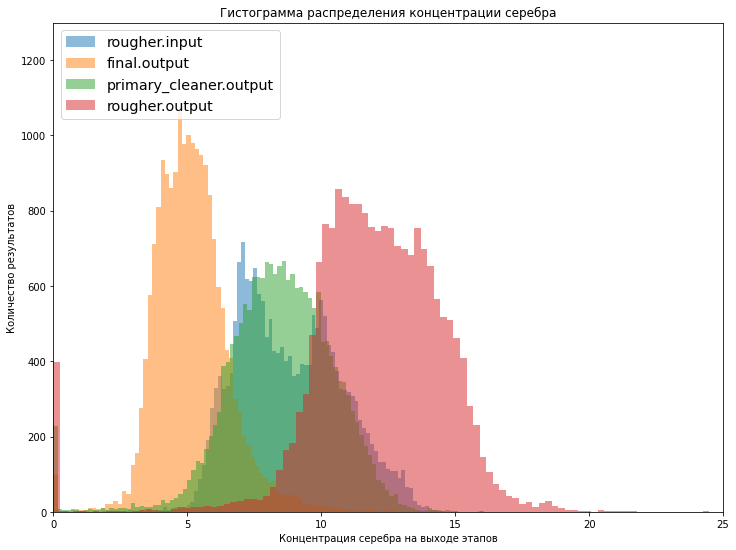

In [20]:
plt.figure(figsize=[12,9])

plt.hist(full['rougher.input.feed_ag'], bins=100, label = 'rougher.input', alpha=.5)
plt.hist(full['final.output.concentrate_ag'], bins=100, label = 'final.output', alpha=.5)
plt.hist(full['primary_cleaner.output.concentrate_ag'], bins=100, label = 'primary_cleaner.output', alpha=.5)
plt.hist(full['rougher.output.concentrate_ag'], bins=100, label = 'rougher.output', alpha=.5)

plt.xlim([0, 25])
plt.ylim([0, 1300])

plt.xlabel("Концентрация серебра на выходе этапов")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения концентрации серебра")
plt.show()

The concentration of silver decreases with each purification step.

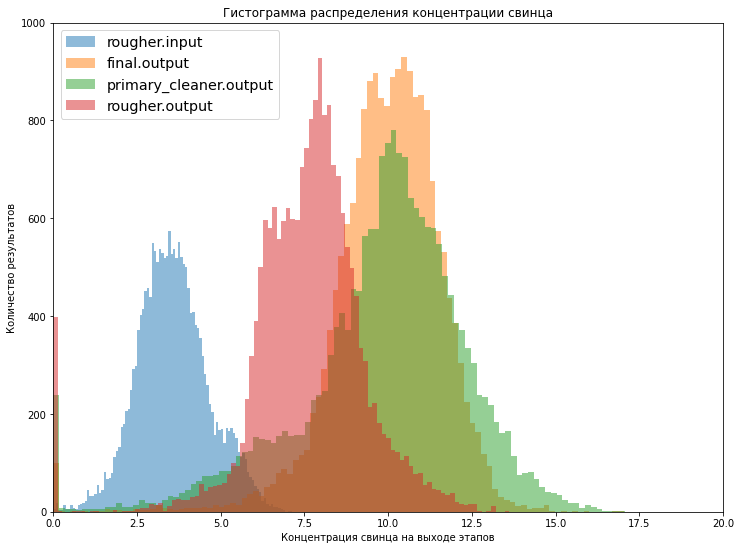

In [21]:
plt.figure(figsize=[12,9])

plt.hist(full['rougher.input.feed_pb'], bins=100, label = 'rougher.input', alpha=.5)
plt.hist(full['final.output.concentrate_pb'], bins=100, label = 'final.output', alpha=.5)
plt.hist(full['primary_cleaner.output.concentrate_pb'], bins=100, label = 'primary_cleaner.output', alpha=.5)
plt.hist(full['rougher.output.concentrate_pb'], bins=100, label = 'rougher.output', alpha=.5)

plt.xlim([0, 20])
plt.ylim([0, 1000])

plt.xlabel("Концентрация свинца на выходе этапов")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения концентрации свинца")
plt.show()

The lead concentration increases from the rougher stage to the primary cleaner stage and then stabilizes. This is associated with the chemical processes involved in gold purification. When using nitric acid leaching, a significant amount of lead sulfate is formed in the concentrate. The overall increase in lead concentration is not only due to this process but also due to the purification of other components from the gold-bearing ore.

### The size of the raw material particles

In order to compare distributions of samples of different sizes, it is better to use density or kde plots instead of frequency histograms (on the Y-axis the proportion relative to the dataset instead of the absolute quantity). The presence or absence of a difference will be more obvious

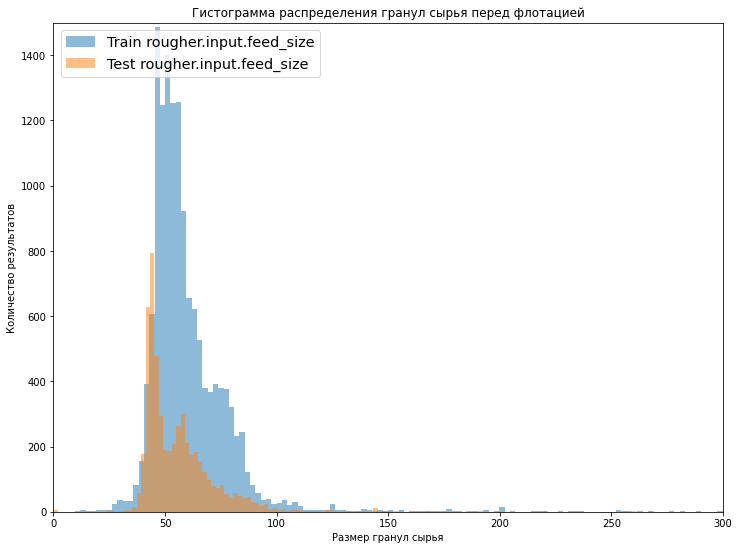

In [22]:
#Let's study the dimensions of raw materials at different stages of process.

plt.figure(figsize=[12,9])

plt.hist(train['rougher.input.feed_size'], bins=200, label = 'Train rougher.input.feed_size', alpha=.5)
plt.hist(test['rougher.input.feed_size'], bins=200, label = 'Test rougher.input.feed_size', alpha=.5)

plt.xlim([0, 300])
plt.ylim([0, 1500])

plt.xlabel("Размер гранул сырья")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения гранул сырья перед флотацией")
plt.show()

The distribution of particles before flotation is similar to normal with a shift to the left in both the training set and the test sample. There are many emissions after granule size 100.

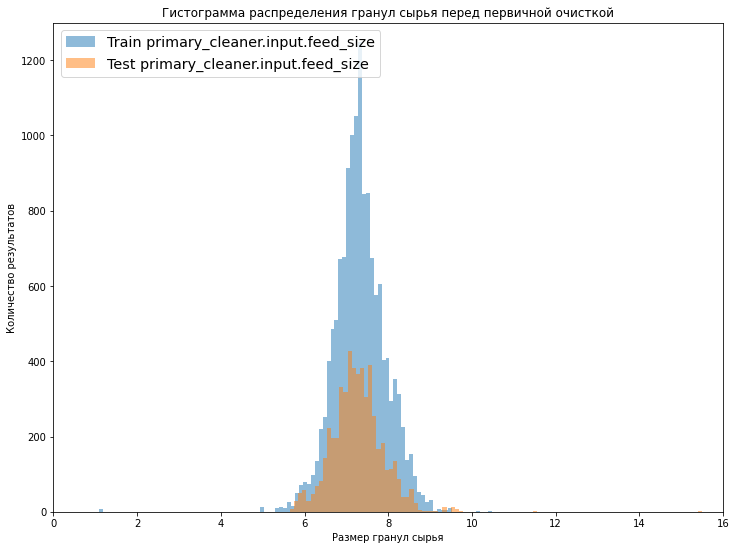

In [23]:
plt.figure(figsize=[12,9])

plt.hist(train['primary_cleaner.input.feed_size'], bins=100, label = 'Train primary_cleaner.input.feed_size', alpha=.5)
plt.hist(test['primary_cleaner.input.feed_size'], bins=100, label = 'Test primary_cleaner.input.feed_size', alpha=.5)

plt.xlim([0, 16])
plt.ylim([0, 1300])

plt.xlabel("Размер гранул сырья")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения гранул сырья перед первичной очисткой")
plt.show()

Particle sizes before primary purification have a normal distribution.

In [24]:
train['rougher.input.feed_size'].describe()

count    14149.000000
mean        60.239856
std         23.005310
min          9.659576
25%         48.966751
50%         55.269784
75%         66.007526
max        484.967466
Name: rougher.input.feed_size, dtype: float64

In [25]:
test['rougher.input.feed_size'].describe()

count    5290.000000
mean       55.952754
std        19.080334
min         0.046369
25%        43.906504
50%        50.846843
75%        62.451165
max       392.494040
Name: rougher.input.feed_size, dtype: float64

In [26]:
var_train = np.var(train['rougher.input.feed_size'])
var_train

529.2068649509116

In [27]:
var_test = np.var(test['rougher.input.feed_size'])
var_test

363.99032899257844

Intermediate Conclusions

The variance for the training sample is 529, for the test sample it is 364; according to the histogram, there are quite a lot of outliers in the training data. The describe method showed that the average size of raw material granules on the training set is 60 microns, and on the test set - 56.

Graphs of raw material particle density before flotation

<AxesSubplot:xlabel='rougher.input.feed_size', ylabel='Density'>

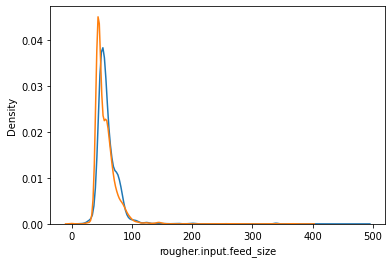

In [28]:
sns.kdeplot(train['rougher.input.feed_size'] ) 
sns.kdeplot(test['rougher.input.feed_size'] ) 

Graphs of raw material particle density before primary purification

<AxesSubplot:xlabel='primary_cleaner.input.feed_size', ylabel='Density'>

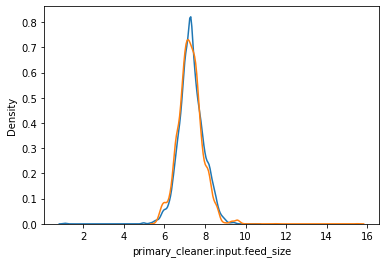

In [29]:
sns.kdeplot(train['primary_cleaner.input.feed_size'] ) 
sns.kdeplot(test['primary_cleaner.input.feed_size']) 

The particle size distributions of the raw materials before floration and in the final concentrate in the test and training samples are practically the same. The assessment of the models will be adequate.

### Total concentration of all substances at different stages

In [30]:
#let's find the total concentration of metals (ag, pb, sol, au) in the raw materials
sum_r_feed = full[['rougher.input.feed_ag', 
                   'rougher.input.feed_pb', 
                   'rougher.input.feed_sol', 
                   'rougher.input.feed_au']].sum(axis=1)



In [31]:
sum_r_feed.head()

0    51.680034
1    50.659114
2    50.609929
3    51.061546
4    47.859163
dtype: float64

Text(0.5, 1.0, 'Суммарная концентрация металлов в сырье')

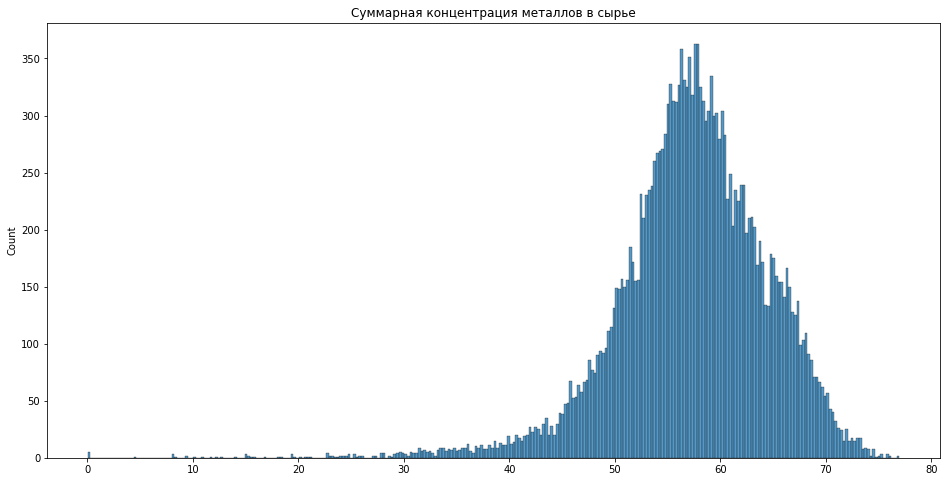

In [32]:
#Let's build a histogram for the total concentration of metals in raw materials
plt.subplots(figsize = (16,8))
sns.histplot(sum_r_feed, fill=True, bins=300, palette='coolwarm')
plt.title('Суммарная концентрация металлов в сырье')

In [33]:
#let's find the total concentration of metals (ag, pb, sol, au) in the rough concentrate
sum_r_conc = full[['rougher.output.concentrate_pb', 
                   'rougher.output.concentrate_ag', 
                   'rougher.output.concentrate_sol', 
                   'rougher.output.concentrate_au']].sum(axis=1)

Text(0.5, 1.0, 'Суммарная концентрация металлов в черновом концентрате')

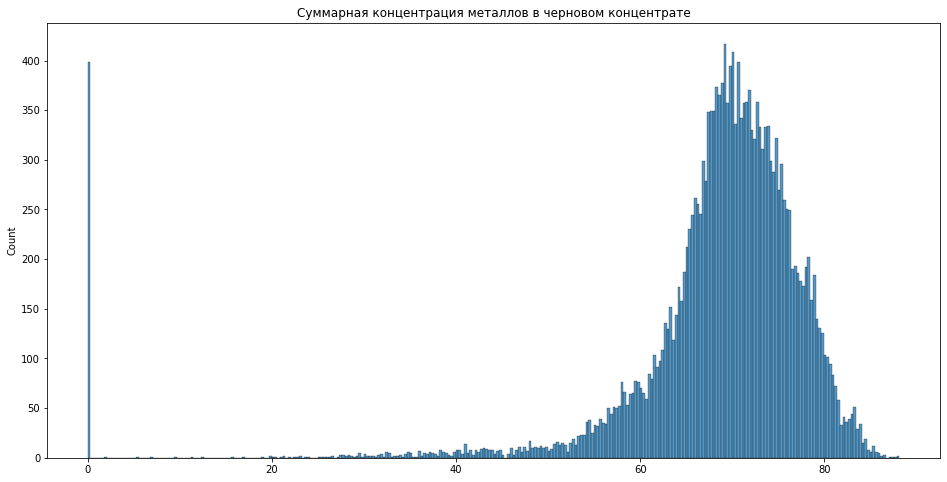

In [34]:
#Let's build a histogram for the total concentration of metals in the rough concentrate
plt.subplots(figsize = (16,8))
sns.histplot(sum_r_conc, fill=True, bins=300, palette='coolwarm')
plt.title('Суммарная концентрация металлов в черновом концентрате')

In [35]:
#let's find the total concentration of metals (ag, pb, sol, au) in the final concentrate
sum_fin_conc = full[['final.output.concentrate_pb', 
                   'final.output.concentrate_ag', 
                   'final.output.concentrate_sol', 
                   'final.output.concentrate_au']].sum(axis=1)

Text(0.5, 1.0, 'Суммарная концентрация металлов в финальном концентрате')

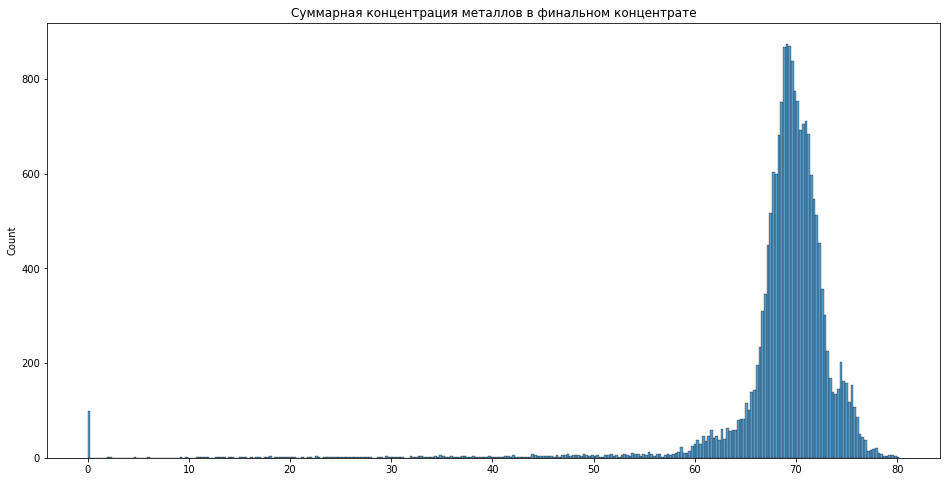

In [36]:
#Let's build a histogram for the total concentration of metals in the final concentrate
plt.subplots(figsize = (16,8))
sns.histplot(sum_fin_conc, fill=True, bins=300, palette='coolwarm')
plt.title('Суммарная концентрация металлов в финальном концентрате')

The data exhibits numerous outliers. The distributions are skewed to the left. There are also a lot of zero values, which are necessary for modeling purposes. Anomalies are mainly present at the rougher stage of purification, especially around zero. There are almost none at the raw material stage, and there are some in the final concentrate, but not as many as in the rougher stage. These anomalies can affect the final calculated characteristics, so it's important to remove anomalies for all types of total concentrations in the training dataset. After all, anomalies can occur separately for each substance (there may not always be gold particles in the ore), but cumulatively, it's unlikely (there will be something in the ore). And if we have anomalies, there is a high probability of measurement inaccuracy.

In [37]:
def filter_outliers(full, column_name, remove_outliers=False):
#outliers filtering function
    full_column = full[column_name]
    quartile_1 = full_column.describe()['25%']
    quartile_3 = full_column.describe()['75%']
    interquartile_range = quartile_3 - quartile_1
    upper_whisker = quartile_1 + 1.5 * interquartile_range
    lower_whisker = max(quartile_1 - 1.5 * interquartile_range, full_column.min())
    outliers = full[(full_column < lower_whisker) | (full_column > upper_whisker) |
                 (full_column.isnull())]
    if remove_outliers:
        full.drop(outliers.index, inplace=True)

In [38]:
full['rougher.input.feed_sum'] = full['rougher.input.feed_ag'] + full['rougher.input.feed_pb'] 
+ full['rougher.input.feed_sol'] + full['rougher.input.feed_au']
#total values of input raw materials

0        43.294744
1        42.231968
2        42.333852
3        42.980430
4        40.011372
           ...    
19434    42.705637
19435    43.430170
19436    44.599087
19437    44.076688
19438    43.500610
Length: 19439, dtype: float64

In [39]:
full['rougher.output.concentrate_sum'] = full['rougher.output.concentrate_ag'] + full['rougher.output.concentrate_pb'] 
+ full['rougher.output.concentrate_sol'] + full['rougher.output.concentrate_au']
#total values of concentrate after floration

0        47.823105
1        48.118038
2        47.191207
3        46.662088
4        46.257124
           ...    
19434    48.672426
19435    48.225407
19436    37.897698
19437    46.887514
19438    46.882369
Length: 19439, dtype: float64

In [40]:
full['final.output.concentrate_sum'] = full['final.output.concentrate_ag'] + full['final.output.concentrate_pb']
+ full['final.output.concentrate_sol'] + full['final.output.concentrate_au']
#total values of the final concentrate

0        47.699345
1        47.959411
2        48.041259
3        47.548453
4        47.713557
           ...    
19434    53.517436
19435    53.729029
19436    53.681704
19437    53.207620
19438    53.016948
Length: 19439, dtype: float64

In [41]:
#outliers filtering
columns = ['rougher.input.feed_sum','rougher.output.concentrate_sum','final.output.concentrate_sum']
for column_name in columns:
    filter_outliers(full, column_name, remove_outliers=True)

In [42]:
#Removing columns

full = full.drop(['rougher.input.feed_sum','final.output.concentrate_sum','rougher.output.concentrate_sum'], axis=1)


## Model

Let's select the columns from the test sample on which the model will be trained. The data column is meaningless for the training model. The data from the columns of the rougher stage will be used to predict rougher.output.recovery. All columns from the test set will be used to calculate final.output.recovery.

In [43]:
#Let's create a dataset for target features missing in the test sample
df_target = full[['date', 'rougher.output.recovery', 'final.output.recovery']]
df_target.head()

,date,rougher.output.recovery,final.output.recovery
0,2016-01-15 00:00:00,87.107763,70.541216
1,2016-01-15 01:00:00,86.843261,69.266198
2,2016-01-15 02:00:00,86.842308,68.116445
3,2016-01-15 03:00:00,87.226430,68.347543
4,2016-01-15 04:00:00,86.688794,66.927016


In [44]:
#and add these features to the test sample from the full
test = test.merge(df_target, how = 'left', on = 'date')

In [45]:
#Let's remove the date columnй
test.drop(['date'], axis=1, inplace=True)

In [46]:
#Let's remove from the training set those features that are not in the test sample
train = train.drop(set(train.columns)-set(test.columns), axis=1)

### sMAPE

“symmetric mean absolute percentage deviation” this metric is similar to MAE, is expressed not in absolute values, but in relative ones. Why symmetrical? It equally takes into account the scale of both the target feature and the prediction.

In [47]:
def smape_total(target_rougher, predicted_rougher, target_final, predicted_final):
  smape_rough = 1/len(target_rougher) * np.sum(2 * np.abs(
      target_rougher - predicted_rougher) / (np.abs(target_rougher) + np.abs(predicted_rougher))*100)
  smape_fin = 1/len(target_final) * np.sum(2 * np.abs(
      target_final - predicted_final) / (np.abs(target_final) + np.abs(predicted_final))*100)
  return (0.25*smape_rough) + (0.75*smape_fin)

In [48]:
def smape(target, predicted):
  return 1/len(target) * np.sum(2 * np.abs(
       target - predicted) / (np.abs(target) + np.abs(predicted))*100)
def smape_final(rougher, final):
  return 0.25*rougher + 0.75*final

In [49]:
# Let's highlight the features on the training sample for the rough concentrate (rougher)
features_train_r = train.filter(regex='^rougher',axis=1)
features_train_r = features_train_r.drop(['rougher.output.recovery'], axis=1)
target_train_r = train['rougher.output.recovery']

# and for the final concentrate (final)
features_train_f = train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train_f = train['final.output.recovery']

# Let's highlight the features on the test sample for rough concentrate (rougher)
features_test_r = test.filter(regex='^rougher',axis=1)
features_test_r = features_test_r.drop(['rougher.output.recovery'], axis=1)
target_test_r = test['rougher.output.recovery']

# and for the final concentrate (final)
features_test_f = test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_test_f = test['final.output.recovery']

In [50]:
random_state = 12345
cv = 5
models = [LinearRegression(),
           DecisionTreeRegressor(random_state=random_state),
           RandomForestRegressor(random_state=random_state)]
results_cross_val = []

for model in models:
    scorer = make_scorer(smape, greater_is_better=False)
    cross_val_score_r = cross_val_score(model, features_train_r, target_train_r,
                                       cv=cv, scoring = scorer).mean()
    cross_val_score_f = cross_val_score(model, features_train_f, target_train_f,
                                       cv=cv, scoring = scorer).mean()
    results_cross_val.append({'Модель:': model.__class__.__name__,
                             'cross_val_score_r':cross_val_score_r,
                             'cross_val_score_f':cross_val_score_f})
    print(smape_final(cross_val_score_r, cross_val_score_f))
print(pd.DataFrame(results_cross_val))
print()

-12.3020563059468
-20.78213566640629
-12.172450782945901
                 Модель:  cross_val_score_r  cross_val_score_f
0       LinearRegression         -12.472324         -12.245300
1  DecisionTreeRegressor         -23.637268         -19.830425
2  RandomForestRegressor         -13.803105         -11.628899



In [51]:
# Let's build a model for linear regression and do cross-validation using the method cross_val_score
model = LinearRegression()
scorer = make_scorer(smape, greater_is_better=False)
rougher_lin = cross_val_score(model, features_train_r, target_train_r, scoring=scorer, cv=5)
final_lin =  cross_val_score(model, features_train_f, target_train_f, scoring=scorer, cv=5)
print('Итоговое sMape для линейной регрессии:', smape_final(rougher_lin, final_lin).mean())

Итоговое sMape для линейной регрессии: -12.3020563059468


In [52]:
for depth in range(1, 12, 2):
    model2 = DecisionTreeRegressor(random_state=12345, max_depth = depth)
    scorer = make_scorer(smape, greater_is_better=False)
    rougher_tree = cross_val_score(model2, features_train_r, target_train_r, scoring=scorer, cv=5)
    final_tree = cross_val_score(model2, features_train_f, target_train_f, scoring=scorer, cv=5)
    print('Глубина:',depth)
    print('Итоговое sMAPE для решающего дерева:',smape_final(rougher_tree, final_tree).mean())
    print('')
print()

Глубина: 1
Итоговое sMAPE для решающего дерева: -11.39791528432384

Глубина: 3
Итоговое sMAPE для решающего дерева: -11.130151428046137

Глубина: 5
Итоговое sMAPE для решающего дерева: -11.561626173678412

Глубина: 7
Итоговое sMAPE для решающего дерева: -16.288097380347534

Глубина: 9
Итоговое sMAPE для решающего дерева: -17.468774038814907

Глубина: 11
Итоговое sMAPE для решающего дерева: -20.992766618565106




The best result for sMape is -11.13 at depth 3. This result is better than linear regression.

In [53]:
#for depth in range(5, 8):
#    print('depth',depth)
#    for num in range(22, 25):
#        model_1 = RandomForestRegressor(random_state=12345, max_depth=depth, n_estimators = num)
#        rougher_forest = cross_val_score(model_1, features_train_r, target_train_r, cv=5)
#        final_forest = cross_val_score(model_1, features_train_f, target_train_f, cv=5)
#        print('num',num)
#        print('Итоговое sMAPE для Случайного леса:',smape_final(rougher_forest, final_forest).mean())
#    print('')
    
#print()

### Verifying the model on a test set

In [54]:
model_r = DecisionTreeRegressor(random_state=12345, max_depth = 3)
model_f = DecisionTreeRegressor(random_state=12345, max_depth = 3)
model_r.fit(features_train_r, target_train_r)
model_f.fit(features_train_f, target_train_f)
test_predictions_r = model_r.predict(features_test_r)
test_predictions_f = model_f.predict(features_test_f)
print('Итоговое sMAPE на тестовой выборке:',smape_total(
    target_test_r, test_predictions_r, target_test_f, test_predictions_f).mean())

Итоговое sMAPE на тестовой выборке: 4.602868614279069


### Adequacy of the model

Let's compare the model with dummy model. In each project, when assessing the quality of the model, it makes sense to conduct such an adequacy check

In [55]:
dummy_model_r = DummyRegressor(strategy="mean")
dummy_model_f = DummyRegressor(strategy="mean")
dummy_model_r.fit(features_train_r, target_train_r)
dummy_model_f.fit(features_train_f, target_train_f)
test_predictions_r = dummy_model_r.predict(features_test_r)
test_predictions_f = dummy_model_f.predict(features_test_f)

print('Итоговое sMAPE для DummyRegressor:',smape_total(
    target_test_r, test_predictions_r, target_test_f, test_predictions_f).mean())

Итоговое sMAPE для DummyRegressor: 4.894004086320963


The minimum value of sMape on the test sample for the decision tree (max_depth=3) is 4.9. This result is better than average, the model is adequate.

## General conclusion

Pre-processing:

We conducted a preliminary analysis of the data, checked the data for missing data, and then processed it. In the test sample, there were no columns with data on the quantity of the product and calculated data - they are not available at the beginning of the technical process and become known only later.
Missing values ​​for final.output, primary_cleaner.output, rougher.calculations, rougher.output, secondary_cleaner.output . We removed these columns from the training set except for the target features.
We checked whether the recovery readings in the observations were calculated correctly.

Research:

According to the data, the concentration of gold increases with each stage. The purpose of flotation and cleaning is to increase the gold concentration. The silver concentration decreases with each cleaning step. The lead concentration increases from the rougher stage to the primary_cleaner stage. And then it is averaged. This is due to the chemical processes of gold purification. When using nitrate leaching, a lot of lead sulfate is formed in the concentrate. The increase in lead concentration in general occurs not only due to this process, but due to the purification of other constituents from the gold ore.
The distribution of particles before flotation is similar to normal with a shift to the left in both the training set and the test sample. Particle sizes before primary purification have a normal distribution.

Model training:

The final model is based on the DecisionTreeRegressor algorithm

Final sMAPE on the test sample: 4.894004086320963. Algorithm parameters: { max_depth: 3}. This result is better than average, the model is adequate.

Several points were worked out in this project. And the most obvious: it is noticeable that the difference in quality metrics (constant and our model) is not too large. Such a discrepancy in metrics is acceptable in this project. To further improve the quality of the simulation it is possible to:

1. Review the quality of data at the input of the machine learning model: re-evaluate anomalies, omissions, compliance with the laws of chemistry and physics, is everything plausible?

2. Development of a machine learning model:
- Creating new features for models, Features Engineering: it may be worth contacting a production technologist and once again going through the business chain of the process.
- Selection of machine learning models and hyperparameters themselves.

3. Parameters of the production process, for example: temperature of raw materials, speed of the conveyor belt, etc.


If Measurement Systems Analysis, or MSA will be condacted, it will allow to understand the reasons for the inaccuracy of data obtained from production. Statistical data analysis, or SPC, will also be an indispensable assistant in solving our problem.

The goal of our project has been achieved, namely, we have completed the important stages of preparing data and building a model for gold production.